In [45]:
'''----------------------------------------------IMPORT ------------------------------------------------------'''
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

'''----------------------------------------------PLOT SETTINGS ------------------------------------------------------'''
plt.style.use('seaborn-colorblind') # Color Scheme for plots
plt.rcParams["font.family"] = "Times New Roman" # Font style
plt.rcParams.update({'font.size': 17}) #Set font size
'''----------------------------------------------SET DATA PATHS ---------------------------------------------------- '''

data_path_spruces = 'G:\\My Drive\\Projects\\UAC\\2021_2022\\UAC_People_DashBoard_BCC Trailhead Data_Time series_butler.csv'
data_path_griz = 'G:\\My Drive\\Projects\\UAC\\2021_2022\\UAC_People_DashBoard_LCC Trailhead Data_Time series_Griz.csv'
data_path_wp = 'G:\\My Drive\\Projects\\UAC\\2021_2022\\UAC_People_DashBoard_LCC Trailhead Data_Time series_WhitePine.csv'

data_spruces = pd.read_csv(data_path_spruces)
data_griz = pd.read_csv(data_path_griz)
data_wp = pd.read_csv(data_path_wp)

In [19]:

data_spruces['Converted Datetime'] = pd.DatetimeIndex(data_spruces['Converted Datetime'])
data_spruces = data_spruces.set_index('Converted Datetime')


data_griz['Converted_Date'] = pd.DatetimeIndex(data_griz['Converted_Date'])
data_griz = data_griz.set_index('Converted_Date')


data_wp['Converted_datetime'] = pd.DatetimeIndex(data_wp['Converted_datetime'])
data_wp = data_wp.set_index('Converted_datetime')

In [20]:

dnight_spruces = data_spruces.between_time('0:00:00', '6:00:00')
dnight_griz = data_griz.between_time('0:00:00', '6:00:00')
dnight_wp = data_wp.between_time('0:00:00', '6:00:00')

In [21]:
#dnight = dnight.set_index('Converted_Date')
dmax_spruces = dnight_spruces.resample('D').max()
dmax_griz = dnight_griz.resample('D').max()
dmax_wp = dnight_wp.resample('D').max()

In [22]:
dtot_spruces = data_spruces.resample('D').sum()
dfinal_spruces = dtot_spruces - dmax_spruces

dtot_griz= data_griz.resample('D').sum()
dfinal_griz = dtot_griz - dmax_griz

dtot_wp = data_wp.resample('D').sum()
dfinal_wp = dtot_wp - dmax_wp


Text(0, 0.5, 'N')

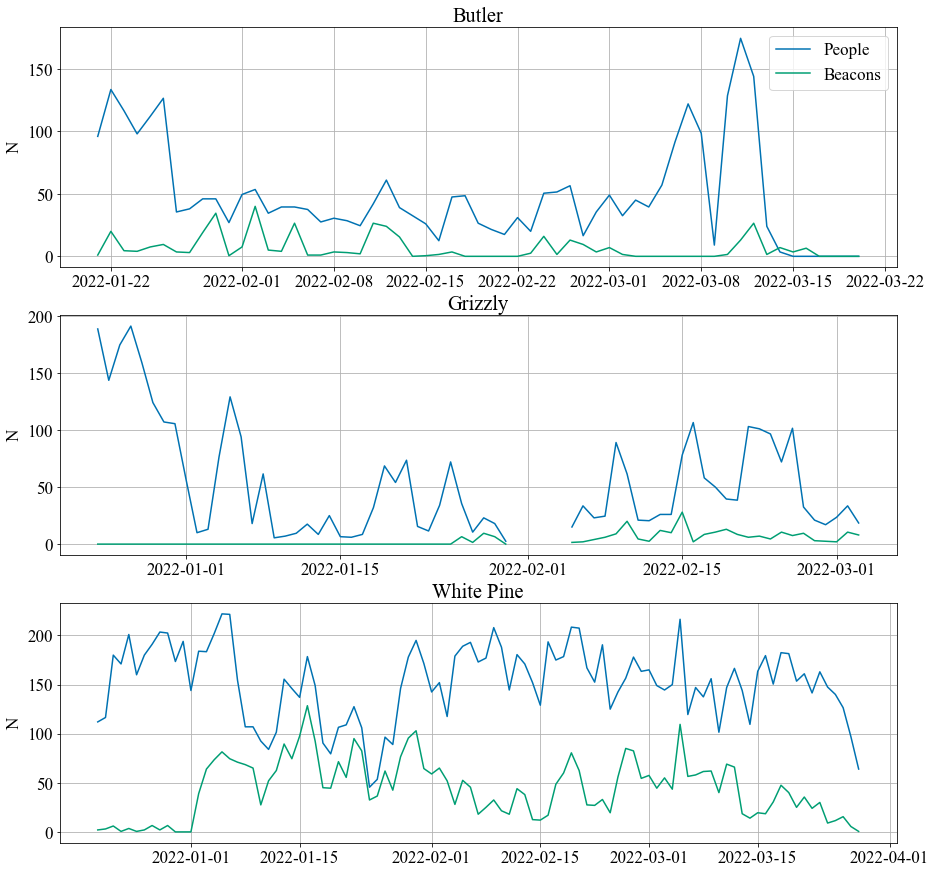

In [61]:

fig, axs = plt.subplots(3)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].plot(dfinal_spruces['People'][:60]/2,label = "People")
axs[0].plot(dfinal_spruces['Beacons'][:60]/2,label = "Beacons")
axs[0].grid()
axs[0].title.set_text('Butler')
axs[0].legend()
axs[0].set_ylabel('N')

axs[1].plot(dfinal_griz['People']/2)
axs[1].plot(dfinal_griz['Beacons']/2)
axs[1].title.set_text('Grizzly')
axs[1].grid()
axs[1].set_ylabel('N')

axs[2].plot(dfinal_wp['People'][:110]/2)
axs[2].plot(dfinal_wp['Beacons'][:110]/2)
axs[2].grid()
axs[2].title.set_text('White Pine')
axs[2].set_ylabel('N')


# Hide x labels and tick labels for all but bottom plot.


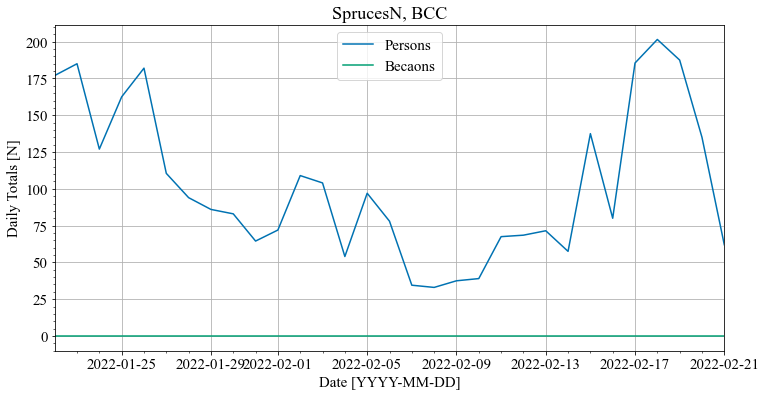

In [52]:


plt.figure(figsize=(12, 6))
plt.plot(dfinal['People'][40:]/2)
plt.plot(dtot['Beacons'][40:]/2)
plt.ylabel('Daily Totals [N]')
plt.xlabel('Date [YYYY-MM-DD]')
plt.minorticks_on()
plt.grid(b=bool, which='major', axis='both')
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('SprucesN, BCC')

plt.legend(['Persons','Becaons']) # legend in upper left side
#plt.show()
plt.savefig('Timeseries_SprucesN_BCC_People_Beacons' +'.pdf', bbox_inches='tight')

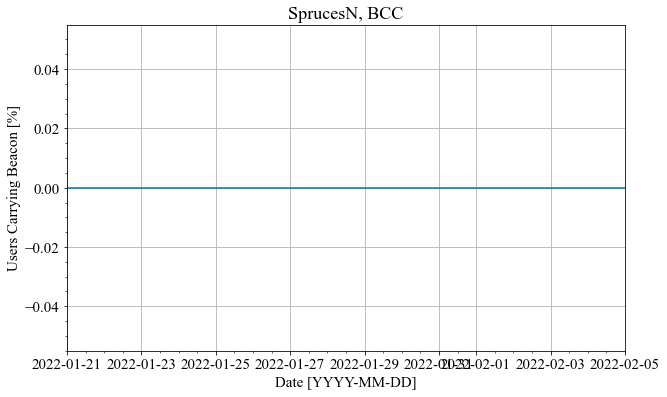

In [53]:
plt.figure(figsize=(10, 6))

plt.plot((dtot['Beacons'][:]/dfinal['People'][:55])*100)
plt.ylabel('Users Carrying Beacon [%]')
plt.xlabel('Date [YYYY-MM-DD]')
plt.minorticks_on()
plt.grid(b=bool, which='major', axis='both')
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('SprucesN, BCC')
#plt.show()
plt.savefig('Timeseries_SprucesN_BCC_Beacons_Percent' +'.pdf', bbox_inches='tight')

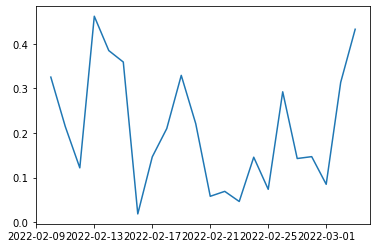

In [109]:
plt.figure()
plt.plot(dtot['Beacons'][50:100]/dfinal['People'][50:100])
plt.show()